# Classification

## Загрузка данных
#### Данные беру из Churn_modeling.zip

# Colab

https://drive.google.com/file/d/1ilb0iIuToOiuFSQpfWQvTCG4jl8I6hOx/view?usp=sharing

In [1]:
! gdown --id 1ilb0iIuToOiuFSQpfWQvTCG4jl8I6hOx

"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


! unzip /content/churn_modeling.zip -d /content/churn_modeling/

In [9]:
! unzip /content/churn_modeling.zip -d /content/churn_modeling/

"unzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [1]:
import pandas as pd

In [8]:
df = pd.read_csv('/content/churn_modeling/Churn_Modelling.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/churn_modeling/Churn_Modelling.csv'

In [ ]:
df.head()

# Pycharm

In [4]:
from zipfile import ZipFile

with ZipFile('churn_modeling.zip', 'r') as zf:
    zf.extractall()

In [1]:
'------------------------------------------------------------------------------------------------'

'------------------------------------------------------------------------------------------------'

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Анализ данных (быстрый)

In [4]:
df.shape

(10000, 14)

In [5]:
df.isna().mean()

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df.Exited.value_counts(normalize=True)  # value counts в процентах
# 20% клиентов ушли

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

## Обучающая, валидационная и тестовая выборки

In [9]:
from sklearn.model_selection import  train_test_split

Будем использовать стратификацию, для более ровной разбивки данных, т.к. маленькая выборка

In [10]:
train, test = train_test_split(df, random_state=42, train_size=0.6, stratify=df.Exited)

In [11]:
val, test = train_test_split(test, random_state=42, train_size=0.5, stratify=test.Exited)

проверка разбивки

In [12]:
val.Exited.mean(), test.Exited.mean(), train.Exited.mean()

(0.204, 0.2035, 0.20366666666666666)

## Phik

С помощью Phik отберём наиболее важные переменные (по мнению Phik), тем самым сократить работу по анализу
Для человеческого обучения val не нужна, по этому можно обучиться на полном трейне

In [13]:
train_full = pd.concat([train, val])

In [14]:
train_full.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6851,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0
7026,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0
5705,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0
9058,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0
9415,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0


In [15]:
train_full.shape

(8000, 14)

In [16]:
# Для colab
# !pip install phik

In [17]:
import phik

In [18]:
phik_overview = train_full.phik_matrix()

interval columns not set, guessing: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


C:\Users\Zetis\AppData\Local\Programs\Python\Python310\lib\site-packages\phik\data_quality.py:59: UserWarning: The number of unique values of variable Surname is large: 2591. Are you sure this is not an interval variable? Analysis for pairs of variables including Surname can be slow.
  warnings.warn(


Отсортированные переменные по влиянию на модель, по мнению Phik
Для Human learning можно взять 3 самых важных признака исключая целевой (target = Exited)

In [19]:
phik_overview.Exited.sort_values(ascending=False)

Exited             1.000000
NumOfProducts      0.564969
Age                0.498768
IsActiveMember     0.237244
Balance            0.167823
Gender             0.165231
CreditScore        0.105371
Geography          0.104047
CustomerId         0.035477
Tenure             0.030333
RowNumber          0.000000
Surname            0.000000
HasCrCard          0.000000
EstimatedSalary    0.000000
Name: Exited, dtype: float64

## Human learning

Левая колонка - кол-во продуктов у клиента, центральная - к-во клиентов, правая - Score, то есть оценка склонности (вероятность) клиента к чему либо
Если у клиента - 1 продукт, то он склонен к оттоку (27.5%)
Если у клиента - 2 продукта, то он менее склонен к оттоку (7.7%)
Если у клиента - 3 продукта, то он сильно склонен к оттоку (82.6%)

##### ! Score НЕ всегда равен вероятности !

In [20]:
train_full.groupby('NumOfProducts').Exited.agg(['count', 'mean'])

,count,mean
NumOfProducts,,
1,4060,0.275369
2,3673,0.077049
3,219,0.826484
4,48,1.000000


In [21]:
train_full.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6851,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0
7026,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0
5705,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0
9058,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0
9415,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0


In [22]:
model = train_full.groupby('NumOfProducts').Exited.mean().reset_index()

In [23]:
model.head()

,NumOfProducts,Exited
0,1,0.275369
1,2,0.077049
2,3,0.826484
3,4,1.000000


In [24]:
model = model.rename({'Exited': 'score_prod'}, axis=1)

In [25]:
model.head()

,NumOfProducts,score_prod
0,1,0.275369
1,2,0.077049
2,3,0.826484
3,4,1.000000


Приджойним даблицу к фул трейн

In [26]:
train_full = train_full.merge(model, how='left', on='NumOfProducts')

In [27]:
train_full.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049


На фул трейне получим те же цифры, т.к. мы на них и обучались

In [28]:
train_full.groupby('score_prod').Exited.agg(['count', 'mean'])

,count,mean
score_prod,,
0.077049,3673,0.077049
0.275369,4060,0.275369
0.826484,219,0.826484
1.000000,48,1.000000


Для того, чтобы выбрать 0 или 1 в target из scor`a нужно придумать (выбрать) какое нибудь отсечение

## Baseline

Для бейзлайна возьмём среднее
Это будет доля клиентов, которые оттекли

Вероятность того, что клиент оттечёт 20.3% по всей выборке

In [29]:
train_full['score_mean'] = train_full.Exited.mean()

In [30]:
train_full.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049,0.20375
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049,0.20375
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049,0.20375
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369,0.20375
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049,0.20375


Метрика log loss не интерпретируется, по этому данная метрика редко используется для анализа моделей, чаще используется для оптимизации (поиска минимума функции ошибки)

In [31]:
from sklearn.metrics import log_loss

посчитаем логлос на основе средней ошибки

In [32]:
log_loss(train_full.Exited, train_full.score_mean)

0.5055572860042145

In [33]:
log_loss(train_full.Exited, train_full.score_prod)

0.4359616823203511

Ошибка score prod меньше и лучше чем baseline

## Uplift
По сути uplift - метрика, которую мы разработали и по которой будем сравнивать разные модели

In [34]:
train_full.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049,0.20375
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049,0.20375
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049,0.20375
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369,0.20375
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049,0.20375


Средний отток во всей выборке ≈20%

In [35]:
train_full.Exited.mean()

0.20375

Средний отток по случайным 10% от выборки

In [36]:
train_full.Exited.sample(frac=0.1, random_state=42).mean()

0.20625

Средний ототок по 20%, 30%, 50% выборки

Средний отток по случайной подвыборке будет всегда +- 20% т.к. во всей выборке средний отток 20%

In [37]:
train_full.Exited.sample(frac=0.2, random_state=42).mean(), train_full.Exited.sample(frac=0.3, random_state=42).mean(), train_full.Exited.sample(frac=0.5, random_state=42).mean()

(0.210625, 0.20333333333333334, 0.20675)

всего в выборке отточных клиентов:

In [38]:
exited_all = train_full.Exited.sum()

In [39]:
exited_all

1630

Можно замерить какой процент оттока будет в каждой подвыборке.
Получается что в 20% случайной подвыборке 337 отточных пользователей

In [40]:
train_full.Exited.sample(frac=0.2, random_state=42).sum()

337

Если взять 20% выборки и поделить на количество отточных пользователей в ней, то получится тоже 20%

In [41]:
train_full.Exited.sample(frac=0.2, random_state=42).sum() / exited_all

0.2067484662576687

##### !!! Доля отточников при случайной сортировке пропорциональна размеру выборки !!!
такая сортировка не даёт никакого профита

Отсортируем клиентов по scor`у

In [42]:
train_full = train_full.sort_values('score_prod', ascending=False)

Возьмём 20% из всей выборки

In [43]:
round(len(train_full) * 0.2)

1600

Суммарное количество отточников в верхних 20%

In [44]:
train_full.head(round(len(train_full) * 0.2)).Exited.sum()

583

Процент отточников в верхних 20% выборки - выше 35% провтив 20% в случайной подвыборке

In [45]:
train_full.head(round(len(train_full) * 0.2)).Exited.sum() / exited_all

0.3576687116564417

Посчитаем Uplift: ≈35% / ≈20%
Получается, что данный uplift лучше чем рандом в 1.75 раз

In [46]:
(train_full.head(round(len(train_full) * 0.2)).Exited.sum() / exited_all) / (train_full.Exited.sample(frac=0.2, random_state=42).sum() / exited_all)

1.7560240963855422

## Добавим шум

In [47]:
import numpy as np

In [48]:
np.random.seed(42)  # Фиксируем случайность
np.random.uniform(0, 0.001, size=len(train_full))  # распределение шума от 0 до 0.001

array([0.00037454, 0.00095071, 0.00073199, ..., 0.00045533, 0.00090844,
       0.00010448])

В скоре прод - 4 уникальных значения

In [49]:
train_full.score_prod.nunique()

4

Внесём шум в данные

In [50]:
np.random.seed(42)
train_full['score_prod'] = train_full['score_prod'] - np.random.uniform(0, 0.001, size=len(train_full))

In [51]:
train_full.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean
6946,6876,15665283,Brookes,610,France,Female,57,7,72092.95,4,0,1,113228.82,1,0.999625,0.20375
1245,3153,15724161,Sutton,644,France,Female,40,9,137285.26,4,1,0,77063.63,1,0.999049,0.20375
7056,2542,15679770,Smith,611,France,Female,61,3,131583.59,4,0,1,66238.23,1,0.999268,0.20375
7847,1702,15605279,Francis,792,France,Male,50,9,0.00,4,1,1,194700.81,1,0.999401,0.20375
693,7568,15750545,Chidiebere,629,France,Male,44,5,0.00,4,0,0,117572.59,1,0.999844,0.20375


Теперь в скоре прод ВСЕ значения - искусственно уникальные

In [52]:
train_full.score_prod.nunique()

8000

## Функция для uplift

In [53]:
def uplift(df, score, pct):
    exited_all = df.Exited.sum()
    df = df.sort_values(score, ascending=False)
    exited_found = df.head(round(len(df) * pct)).Exited.sum()
    return (exited_found / exited_all) / pct

In [54]:
uplift(train_full, 'score_prod', 0.2)

1.9079754601226995

Проверим Uplift, на уже известных значениях

In [55]:
exited_all = train_full.Exited.sum()

In [56]:
train_full = train_full.sort_values('score_prod', ascending=False)

In [57]:
train_full.head(round(len(train_full) * 0.2)).Exited.sum() / exited_all

0.3815950920245399

In [58]:
train_full.head(round(len(train_full) * 0.2)).Exited.sum() / exited_all / 0.2

1.9079754601226995

Проверим Uplift для теста

In [59]:
test = test.merge(model, on='NumOfProducts', how='left')

In [60]:
test.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,0.275369
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,0.275369
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,0.275369
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,0.275369
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,0.275369


Добавим шум в тест
При добавлении шума обязательно указывать random seed, для сопоставления результатов

In [61]:
np.random.seed(42)
test['score_prod'] = test['score_prod'] - np.random.uniform(0, 0.001, size=len(test))

In [62]:
test.score_prod.nunique()

2000

In [63]:
test.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,0.274995
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,0.274419
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,0.274637
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,0.274771
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,0.275213


Посчитаем logloss для трейна и теста

In [64]:
log_loss(train_full.Exited, train_full.score_prod)

0.4359717821616623

In [65]:
log_loss(test.Exited, test.score_prod)

0.4338658337619006

Посчитаем Uplift

In [66]:
uplift(train_full, 'score_prod', 0.2)

1.9079754601226995

In [67]:
uplift(test, 'score_prod', 0.2)

1.8427518427518426

## Добавим возраст
т.к. это следующая по значимости переменная по версии Phik

In [68]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.style.use('seaborn-v0_8-colorblind')

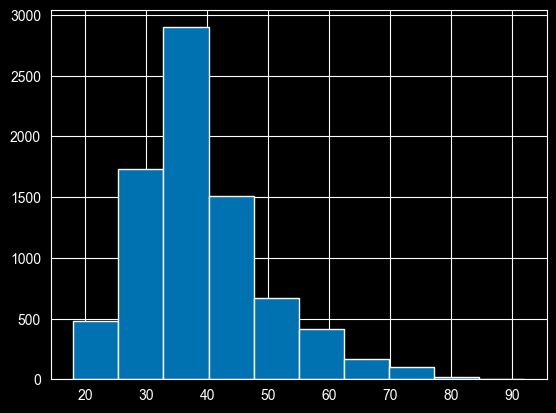

In [69]:
train_full.Age.hist();

Создадим интервалы для груп по возрасту

In [70]:
train_full['age_group'] = pd.qcut(train_full.Age, 5)

In [71]:
train_full.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean,age_group
257,4512,15568006,Ukaegbunam,634,France,Female,45,2,0.00,4,1,0,101039.53,1,0.999979,0.20375,"(40.0, 46.0]"
3036,4655,15593976,Swanson,578,Germany,Female,31,5,102088.68,4,0,0,187866.21,1,0.999966,0.20375,"(17.999, 31.0]"
4054,4404,15616859,Bonwick,602,Germany,Female,43,2,113641.49,4,1,0,115116.35,1,0.999954,0.20375,"(40.0, 46.0]"
3202,9412,15796115,Forbes,689,Germany,Female,40,4,78119.59,4,1,0,119259.34,1,0.999942,0.20375,"(35.0, 40.0]"
1874,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,0.999935,0.20375,"(17.999, 31.0]"


Чем старше клиент, тем больше вероятность того, что он уйдёт

In [72]:
train_full.groupby('age_group').Exited.agg(['count', 'mean'])

,count,mean
age_group,,
"(17.999, 31.0]",1896,0.075422
"(31.0, 35.0]",1424,0.091994
"(35.0, 40.0]",1797,0.146912
"(40.0, 46.0]",1376,0.289971
"(46.0, 92.0]",1507,0.459854


Нельзя применять qcut для другой выборки (тестовой) т.к. она может разделиться по другому. ПО этому будем использовать cut

In [73]:
train_full['age_group'] = pd.cut(train_full.Age, [0, 31, 35, 40, 46, float('inf')])

In [74]:
train_full.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean,age_group
257,4512,15568006,Ukaegbunam,634,France,Female,45,2,0.00,4,1,0,101039.53,1,0.999979,0.20375,"(40.0, 46.0]"
3036,4655,15593976,Swanson,578,Germany,Female,31,5,102088.68,4,0,0,187866.21,1,0.999966,0.20375,"(0.0, 31.0]"
4054,4404,15616859,Bonwick,602,Germany,Female,43,2,113641.49,4,1,0,115116.35,1,0.999954,0.20375,"(40.0, 46.0]"
3202,9412,15796115,Forbes,689,Germany,Female,40,4,78119.59,4,1,0,119259.34,1,0.999942,0.20375,"(35.0, 40.0]"
1874,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,0.999935,0.20375,"(0.0, 31.0]"


In [75]:
train_full.groupby('age_group').Exited.agg(['count', 'mean'])

,count,mean
age_group,,
"(0.0, 31.0]",1896,0.075422
"(31.0, 35.0]",1424,0.091994
"(35.0, 40.0]",1797,0.146912
"(40.0, 46.0]",1376,0.289971
"(46.0, inf]",1507,0.459854


помимо num of products добавим в модель age groups

In [76]:
model = train_full.groupby(['NumOfProducts', 'age_group']).Exited.mean().reset_index()

In [77]:
model = model.rename({'Exited': 'score_prod_age'}, axis=1)

In [78]:
model.head()

,NumOfProducts,age_group,score_prod_age
0,1,"(0.0, 31.0]",0.106774
1,1,"(31.0, 35.0]",0.135908
2,1,"(35.0, 40.0]",0.198646
3,1,"(40.0, 46.0]",0.378873
4,1,"(46.0, inf]",0.542506


In [79]:
train_full = train_full.merge(model, how='left', on=['NumOfProducts', 'age_group'])

In [80]:
train_full.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean,age_group,score_prod_age
0,4512,15568006,Ukaegbunam,634,France,Female,45,2,0.00,4,1,0,101039.53,1,0.999979,0.20375,"(40.0, 46.0]",1.0
1,4655,15593976,Swanson,578,Germany,Female,31,5,102088.68,4,0,0,187866.21,1,0.999966,0.20375,"(0.0, 31.0]",1.0
2,4404,15616859,Bonwick,602,Germany,Female,43,2,113641.49,4,1,0,115116.35,1,0.999954,0.20375,"(40.0, 46.0]",1.0
3,9412,15796115,Forbes,689,Germany,Female,40,4,78119.59,4,1,0,119259.34,1,0.999942,0.20375,"(35.0, 40.0]",1.0
4,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,0.999935,0.20375,"(0.0, 31.0]",1.0


Сравним метрики loglos
предыдущие метрики:

In [81]:
log_loss(train_full.Exited, train_full.score_prod)

0.4359717821616623

In [82]:
uplift(train_full, 'score_prod', 0.2)

1.9079754601226995

Новые метрики:
На первых 20% uplift лучше в 2.7 раз чем рандом

In [83]:
log_loss(train_full.Exited, train_full.score_prod_age)

0.3866695862492173

In [84]:
uplift(train_full, 'score_prod_age', 0.2)

2.702453987730061

Посчитаем эти же показатели для теста:

In [85]:
test['age_group'] = pd.cut(test.Age, [0, 31, 35, 40, 46, float('inf')])

In [86]:
test = test.merge(model, how='left', on=['NumOfProducts', 'age_group'])

In [87]:
log_loss(test.Exited, test.score_prod_age)

0.3870707514157596

In [88]:
uplift(test, 'score_prod_age', 0.2)

2.7518427518427515

## Добавим isActiveMember
Это следующая фича по важности (Phik) после NumberofProducts и Возраста

In [89]:
train_full.IsActiveMember.value_counts()

IsActiveMember
1    4131
0    3869
Name: count, dtype: int64

Если клиент не активный участник, то доля оттока больше

In [90]:
train_full.groupby('IsActiveMember').Exited.agg(['count', 'mean'])

,count,mean
IsActiveMember,,
0,3869,0.267511
1,4131,0.144033


In [91]:
model = train_full.groupby(['NumOfProducts', 'age_group', 'IsActiveMember']).Exited.mean().reset_index()

In [92]:
model = model.rename({'Exited': 'score_prod_age_active'}, axis=1)

In [93]:
model.head()

,NumOfProducts,age_group,IsActiveMember,score_prod_age_active
0,1,"(0.0, 31.0]",0,0.143885
1,1,"(0.0, 31.0]",1,0.072687
2,1,"(31.0, 35.0]",0,0.177650
3,1,"(31.0, 35.0]",1,0.094286
4,1,"(35.0, 40.0]",0,0.223714


In [94]:
train_full = train_full.merge(model, how='left', on=['NumOfProducts', 'age_group', 'IsActiveMember'])

In [95]:
train_full.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,score_mean,age_group,score_prod_age,score_prod_age_active
0,4512,15568006,Ukaegbunam,634,France,Female,45,2,0.00,4,1,0,101039.53,1,0.999979,0.20375,"(40.0, 46.0]",1.0,1.0
1,4655,15593976,Swanson,578,Germany,Female,31,5,102088.68,4,0,0,187866.21,1,0.999966,0.20375,"(0.0, 31.0]",1.0,1.0
2,4404,15616859,Bonwick,602,Germany,Female,43,2,113641.49,4,1,0,115116.35,1,0.999954,0.20375,"(40.0, 46.0]",1.0,1.0
3,9412,15796115,Forbes,689,Germany,Female,40,4,78119.59,4,1,0,119259.34,1,0.999942,0.20375,"(35.0, 40.0]",1.0,1.0
4,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,0.999935,0.20375,"(0.0, 31.0]",1.0,1.0


In [96]:
test = test.merge(model, how='left', on=['NumOfProducts', 'age_group', 'IsActiveMember'])

In [97]:
test.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,age_group,score_prod_age,score_prod_age_active
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,0.274995,"(0.0, 31.0]",0.106774,0.143885
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,0.274419,"(31.0, 35.0]",0.135908,0.177650
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,0.274637,"(35.0, 40.0]",0.198646,0.223714
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,0.274771,"(31.0, 35.0]",0.135908,0.177650
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,0.275213,"(31.0, 35.0]",0.135908,0.094286


Создадим функцию для logloss и uplift, чтобы каждый раз не переписывать одно и тоже

In [98]:
def print_metrics(df, score):
    print(log_loss(df.Exited, df[score]))
    print(uplift(df, score, 0.2))

Проверим работоспособность функции

In [99]:
print_metrics(train_full, 'score_prod_age')

0.3866695862492173
2.702453987730061


Функция работает корректно

In [100]:
log_loss(train_full.Exited, train_full.score_prod_age)

0.3866695862492173

In [101]:
uplift(train_full, 'score_prod_age', 0.2)

2.702453987730061

Теперь посмотрим трейн с новым признаком IsActiveMember

In [102]:
print_metrics(train_full, 'score_prod_age_active')

0.3655019751451003
2.861963190184049


In [103]:
print_metrics(test, 'score_prod_age_active')

0.3638472889481342
2.862407862407862


#### Результат: с добавлением новой переменной IsActiveMember ошибка уменьшилась, а uplift увеличился, то есть, добавление этой переменной было обоснованно
#### P.S. при добавлении возраста и IsActiveMember`а не были добавлены шумы в данные. Для воспроизводимости результатов нужно добавлять в данные шумы

## Машинное обучение

In [104]:
# Для colab
# ! pip install catboost

In [105]:
from catboost import CatBoostClassifier

Посмотрим, какие есть фичи

In [106]:
train_full.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'score_prod',
       'score_mean', 'age_group', 'score_prod_age', 'score_prod_age_active'],
      dtype='object')

Обучимся на тех фичах, на которых проводилось Human learning
Списка категориальних фичей на данном этапе не будет, т.к. все фичи - числовые

In [107]:
X = ['NumOfProducts', 'Age', 'IsActiveMember']
y = ['Exited']

In [108]:
params = {'verbose': 100, 'random_seed': 42}

In [109]:
model = CatBoostClassifier(**params)

In [110]:
model.fit(train[X], train[y], eval_set=(val[X], val[y]))

Learning rate set to 0.04933
0:	learn: 0.6541260	test: 0.6538718	best: 0.6538718 (0)	total: 143ms	remaining: 2m 22s
100:	learn: 0.3554450	test: 0.3428371	best: 0.3428371 (100)	total: 412ms	remaining: 3.67s
200:	learn: 0.3512469	test: 0.3417331	best: 0.3417117 (178)	total: 685ms	remaining: 2.72s
300:	learn: 0.3464561	test: 0.3433005	best: 0.3416354 (217)	total: 984ms	remaining: 2.29s
400:	learn: 0.3435327	test: 0.3449275	best: 0.3416354 (217)	total: 1.26s	remaining: 1.88s
500:	learn: 0.3415461	test: 0.3467565	best: 0.3416354 (217)	total: 1.54s	remaining: 1.53s
600:	learn: 0.3400642	test: 0.3485428	best: 0.3416354 (217)	total: 1.83s	remaining: 1.21s
700:	learn: 0.3388479	test: 0.3501575	best: 0.3416354 (217)	total: 2.11s	remaining: 900ms
800:	learn: 0.3380663	test: 0.3521356	best: 0.3416354 (217)	total: 2.4s	remaining: 596ms
900:	learn: 0.3374401	test: 0.3534681	best: 0.3416354 (217)	total: 2.69s	remaining: 295ms
999:	learn: 0.3369346	test: 0.3547668	best: 0.3416354 (217)	total: 2.99s	re

Понизим лёрнинг рейт, чтобы лучшая итерация была ближе к концу

In [111]:
params = {'verbose': 100,
          'random_seed': 42,
          'learning_rate': 0.01}

In [112]:
model = CatBoostClassifier(**params)

In [113]:
model.fit(train[X], train[y], eval_set=(val[X], val[y]))

0:	learn: 0.6849803	test: 0.6849389	best: 0.6849389 (0)	total: 2.99ms	remaining: 2.98s
100:	learn: 0.3991169	test: 0.3930537	best: 0.3930537 (100)	total: 291ms	remaining: 2.59s
200:	learn: 0.3659581	test: 0.3563817	best: 0.3563817 (200)	total: 567ms	remaining: 2.25s
300:	learn: 0.3589224	test: 0.3476566	best: 0.3476566 (300)	total: 841ms	remaining: 1.95s
400:	learn: 0.3565171	test: 0.3446648	best: 0.3446648 (400)	total: 1.12s	remaining: 1.68s
500:	learn: 0.3553274	test: 0.3433005	best: 0.3432984 (498)	total: 1.39s	remaining: 1.39s
600:	learn: 0.3544987	test: 0.3425379	best: 0.3425379 (600)	total: 1.67s	remaining: 1.11s
700:	learn: 0.3539638	test: 0.3421168	best: 0.3421135 (699)	total: 1.91s	remaining: 816ms
800:	learn: 0.3532817	test: 0.3419139	best: 0.3419139 (800)	total: 2.18s	remaining: 541ms
900:	learn: 0.3524351	test: 0.3416923	best: 0.3416923 (900)	total: 2.44s	remaining: 269ms
999:	learn: 0.3513546	test: 0.3417688	best: 0.3416551 (927)	total: 2.72s	remaining: 0us

bestTest = 0.3

Лучший результат 0.3416 vs 0.3866 HL на трейне

Посмотрим результат на тесте
Предикт автоматически преобразует scor`ы в классы использую дефолтный порог - 0.5

In [114]:
model.predict(test[X])

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Чтобы вызвать скоры, нужно вызвать предикт пробу
Первый столбец - скор на нулевой класс. Чем он больше, тем человек более склонен остаться в компании
Второй столбец - скор на отток (первый класс). Чем он больше, тем человеек более сколонен покинуть компанию

In [115]:
model.predict_proba(test[X])

array([[0.87273278, 0.12726722],
       [0.83992875, 0.16007125],
       [0.76421314, 0.23578686],
       ...,
       [0.85243229, 0.14756771],
       [0.96002386, 0.03997614],
       [0.95396298, 0.04603702]])

Возьмём 2 столбец (отток)

In [116]:
test['score_cat_prod_age_active'] = model.predict_proba(test[X])[0:,1]

In [117]:
test.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,age_group,score_prod_age,score_prod_age_active,score_cat_prod_age_active
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,0.274995,"(0.0, 31.0]",0.106774,0.143885,0.127267
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,0.274419,"(31.0, 35.0]",0.135908,0.177650,0.160071
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,0.274637,"(35.0, 40.0]",0.198646,0.223714,0.235787
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,0.274771,"(31.0, 35.0]",0.135908,0.177650,0.160071
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,0.275213,"(31.0, 35.0]",0.135908,0.094286,0.102859


Проверим скоры из катбуста на уникальность
из 2000, только 254 уникального скора

In [118]:
test.score_cat_prod_age_active.nunique()

254

In [119]:
len(test)

2000

Посчитаем метрики катбуста на 3 фичах

In [120]:
print_metrics(test, 'score_cat_prod_age_active')

0.35878132799643003
2.899262899262899


In [121]:
print_metrics(test, 'score_prod_age_active')

0.3638472889481342
2.862407862407862


#### Результат: катбуст совсем немного обошёл HL

## Обучение на всех фичах

In [122]:
train.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [123]:
train.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [124]:
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6851,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0
7026,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0
5705,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0
9058,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0
9415,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0


Метод для автоматического поиска категориальных фичей

In [125]:
train.select_dtypes(include='object')

,Surname,Geography,Gender
6851,Cantamessa,Germany,Female
7026,Horton,France,Female
5705,Doherty,Germany,Male
9058,Moran,Spain,Female
9415,Hunt,Germany,Female
...,...,...,...
1467,Barbour,Germany,Female
4644,Ponomarev,Spain,Male
8942,Azuka,France,Female
2935,Olejuru,Spain,Male


В cat_features отдельно записываем категориальные фичи

In [126]:
X = ['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography', 'Gender']
cat_features = ['Geography', 'Gender']

y = ['Exited']

Для более удобного использования катбуста воспользуемся его Pull`ом

In [127]:
from catboost import Pool

train_data = Pool(data=train[X],
                  label=train[y],
                  cat_features=cat_features
                 )

valid_data = Pool(data=val[X],
                  label=val[y],
                  cat_features=cat_features
                 )

In [128]:
params = {'verbose': 100,
          'random_seed': 42,
          'learning_rate': 0.01}

In [129]:
model = CatBoostClassifier(**params)

In [130]:
model.fit(train_data, eval_set=valid_data)

0:	learn: 0.6848575	test: 0.6849145	best: 0.6849145 (0)	total: 32.6ms	remaining: 32.6s
100:	learn: 0.3908412	test: 0.3894043	best: 0.3894043 (100)	total: 2.98s	remaining: 26.5s
200:	learn: 0.3457312	test: 0.3445503	best: 0.3445503 (200)	total: 5.78s	remaining: 23s
300:	learn: 0.3288071	test: 0.3307084	best: 0.3307084 (300)	total: 9.55s	remaining: 22.2s
400:	learn: 0.3192987	test: 0.3252459	best: 0.3252459 (400)	total: 15.9s	remaining: 23.7s
500:	learn: 0.3120470	test: 0.3221057	best: 0.3221057 (500)	total: 20.1s	remaining: 20.1s
600:	learn: 0.3054735	test: 0.3204300	best: 0.3204300 (600)	total: 22.7s	remaining: 15.1s
700:	learn: 0.2997053	test: 0.3192377	best: 0.3192377 (700)	total: 25.1s	remaining: 10.7s
800:	learn: 0.2946934	test: 0.3188206	best: 0.3187917 (794)	total: 27.6s	remaining: 6.85s
900:	learn: 0.2890177	test: 0.3185731	best: 0.3185731 (900)	total: 30.1s	remaining: 3.31s
999:	learn: 0.2831978	test: 0.3186396	best: 0.3185004 (978)	total: 32.6s	remaining: 0us

bestTest = 0.318

Лучший результат 0.3185 vs 0.3416 на 3 фичах

Посмотрим результат на тесте

In [131]:
test['score_cat_prod_age_active_all_features'] = model.predict_proba(test[X])[0:,1]

In [132]:
test.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_prod,age_group,score_prod_age,score_prod_age_active,score_cat_prod_age_active,score_cat_prod_age_active_all_features
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,0.274995,"(0.0, 31.0]",0.106774,0.143885,0.127267,0.131844
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,0.274419,"(31.0, 35.0]",0.135908,0.177650,0.160071,0.074020
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,0.274637,"(35.0, 40.0]",0.198646,0.223714,0.235787,0.186876
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,0.274771,"(31.0, 35.0]",0.135908,0.177650,0.160071,0.087403
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,0.275213,"(31.0, 35.0]",0.135908,0.094286,0.102859,0.056658


Метрики logloss и uplift улучшились относительно катбуста с 3-мя фичами

In [133]:
print_metrics(test, 'score_cat_prod_age_active_all_features')

0.3296082204006806
3.1449631449631448


In [134]:
print_metrics(test, 'score_cat_prod_age_active')

0.35878132799643003
2.899262899262899


## Feature importances

Посмотрим и сравним важность фичей катбуста в модели и прогноз Phik

In [135]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,NumOfProducts,27.408724
1,Age,21.567747
2,Balance,11.455919
3,Geography,10.011145
4,IsActiveMember,7.420335
5,EstimatedSalary,5.163513
6,CustomerId,4.965796
7,CreditScore,4.482999
8,Tenure,3.637201
9,Gender,3.089379


В целом Phik показал неплохой результат и им можно пользоваться, чтобы начать анализ данных

In [136]:
phik_overview.Exited.sort_values(ascending=False)

Exited             1.000000
NumOfProducts      0.564969
Age                0.498768
IsActiveMember     0.237244
Balance            0.167823
Gender             0.165231
CreditScore        0.105371
Geography          0.104047
CustomerId         0.035477
Tenure             0.030333
RowNumber          0.000000
Surname            0.000000
HasCrCard          0.000000
EstimatedSalary    0.000000
Name: Exited, dtype: float64

## Shap

In [137]:
# Для colab
# !pip install shap

In [144]:
import shap
shap.initjs()

Проверим shap values сразу на тесте, но данную процедуру можно проводить и с трейном

In [156]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[X])
np.float = float

На summary_plot видно:
чем выше возраст, тем более человек склонен к оттоку

In [157]:
train[X]

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography,Gender
6851,15779103,527,39,9,96748.89,2,1,0,94711.43,Germany,Female
7026,15588123,677,27,2,0.00,2,0,1,114685.92,France,Female
5705,15698703,628,40,5,181768.32,2,1,1,129107.97,Germany,Male
9058,15802560,470,48,6,140576.11,1,1,1,116971.05,Spain,Female
9415,15750407,768,43,2,129264.05,2,0,0,19150.14,Germany,Female
...,...,...,...,...,...,...,...,...,...,...,...
1467,15681843,624,35,0,180303.24,2,1,0,163587.90,Germany,Female
4644,15714240,712,74,5,0.00,2,0,0,151425.82,Spain,Male
8942,15709780,667,37,9,71786.90,2,1,1,67734.79,France,Female
2935,15689425,687,35,8,100988.39,2,1,0,22247.27,Spain,Male


In [158]:
test[X]

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography,Gender
0,15645353,607,26,1,0.00,1,1,0,29818.20,France,Male
1,15594576,524,32,1,144875.71,1,0,0,187740.04,France,Male
2,15811927,733,38,3,157658.36,1,0,0,19658.43,France,Female
3,15675675,850,32,5,106290.64,1,1,0,121982.73,France,Female
4,15682914,850,34,2,72079.71,1,1,1,115767.93,France,Male
...,...,...,...,...,...,...,...,...,...,...,...
1995,15795079,596,67,6,0.00,2,1,1,138350.74,Spain,Male
1996,15601550,595,36,6,85768.42,1,1,1,24802.77,Spain,Male
1997,15659366,807,43,1,105799.32,2,1,0,34888.04,France,Male
1998,15740072,720,37,2,120328.88,2,1,1,138470.21,France,Female


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


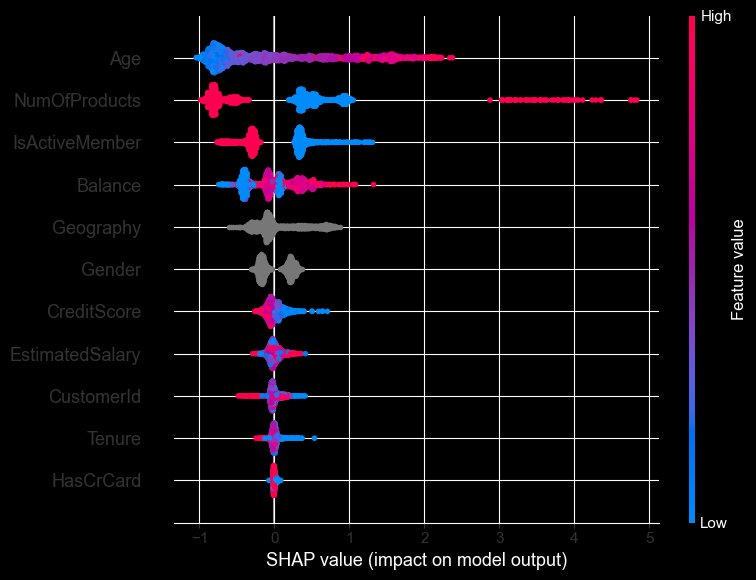

In [159]:
shap.summary_plot(shap_values, test[X])

In [160]:
train_full.groupby('NumOfProducts').Exited.agg(['count', 'mean'])

,count,mean
NumOfProducts,,
1,4060,0.275369
2,3673,0.077049
3,219,0.826484
4,48,1.000000


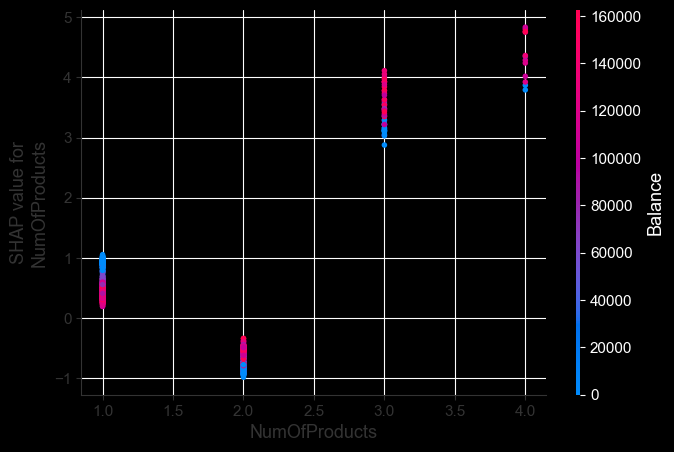

In [161]:
shap.dependence_plot('NumOfProducts', shap_values, test[X])

Построим dependence plot по всем фичам используя цикл for

In [162]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,NumOfProducts,27.408724
1,Age,21.567747
2,Balance,11.455919
3,Geography,10.011145
4,IsActiveMember,7.420335
5,EstimatedSalary,5.163513
6,CustomerId,4.965796
7,CreditScore,4.482999
8,Tenure,3.637201
9,Gender,3.089379


In [163]:
features = model.get_feature_importance(prettified=True)['Feature Id'].values

In [164]:
features

array(['NumOfProducts', 'Age', 'Balance', 'Geography', 'IsActiveMember',
       'EstimatedSalary', 'CustomerId', 'CreditScore', 'Tenure', 'Gender',
       'HasCrCard'], dtype=object)

Из графиков видно:
1.(NumOfProducts) Менее всего склонны к оттоку клиенты с 2 продуктами, если 3 и более продуктов - сильно сколонны к оттоку
2. (Age) С увеличением возраста (≈35 до ≈55) склонность к оттоку увеличивается, а с ≈55 до ≈80 склонность к оттоку уменьшается, хотя в последнем интервале меньше клиентов
3. (Balance) противоречевый график, но в целом: чем больше баланс, тем выше склонность к оттоку
4. (Geography) В Германии больший отток, по сравнению с Францией и Испанией
5. (ActiveMember) Если клиент не активный, то он сильно склонен к оттоку
6. (Salary) До определённого значения зарплаты клиенты менее склонны к оттоку, а после преодоления порога (с увеличением зарплаты) становятся более склонны к оттоку
7. (CustomerId) по каким то причинам в середине графика более склонны к оттоку
8. (CreditScore) Чем больше кредит скор, тем меньше склонны к оттоку
9. (Tenure) При длительном договоре менее склонны к оттоку, при коротком договоре более склонны к оттоку
10. (Gender) Женщины более склонны к оттоку, чем мужчины
11. (HasCrCard) Не очень полезная фича


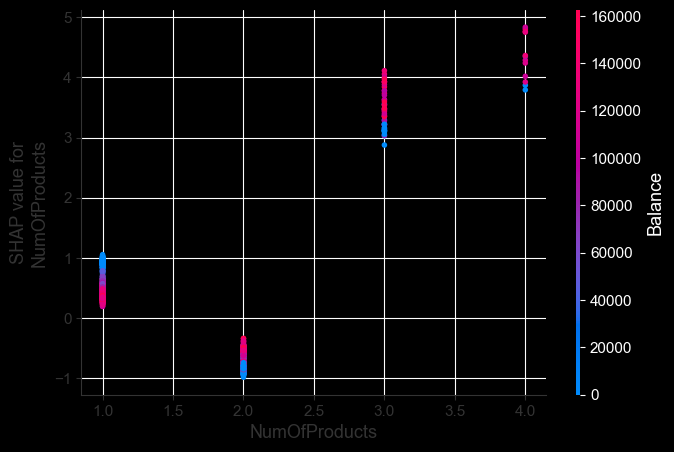

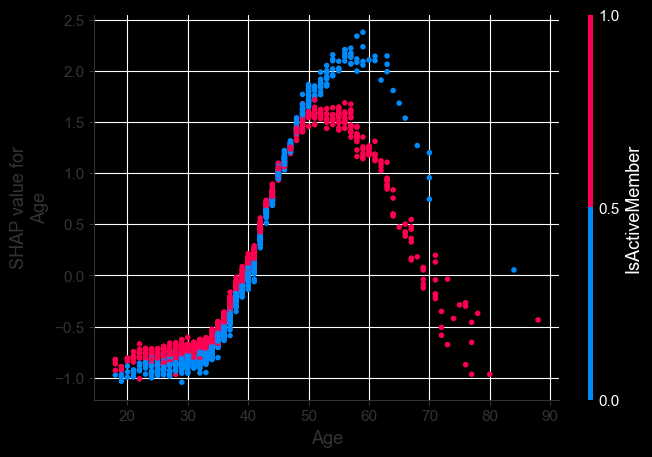

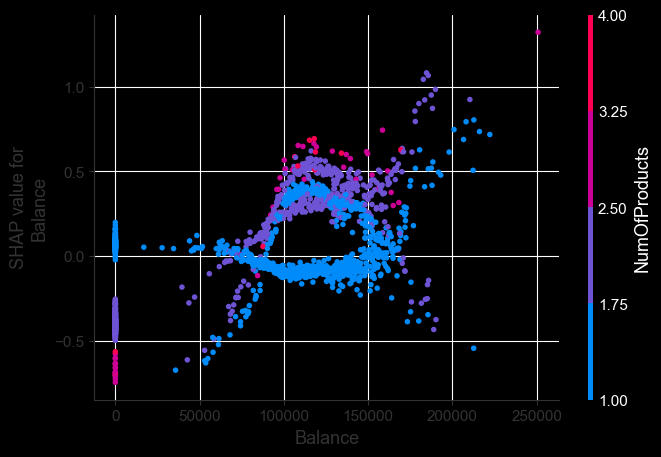

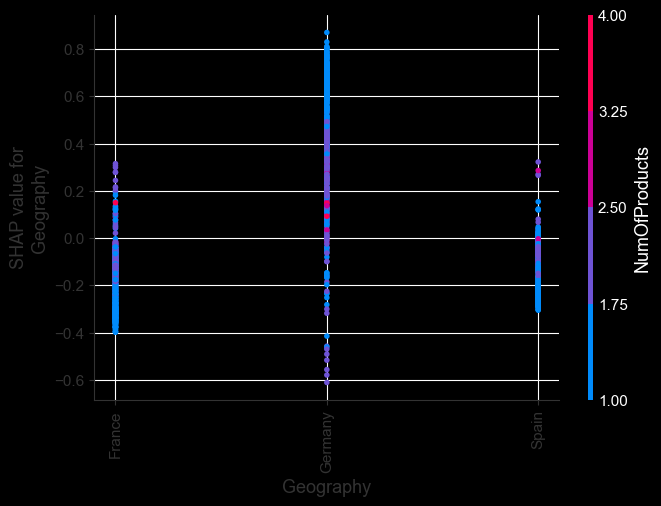

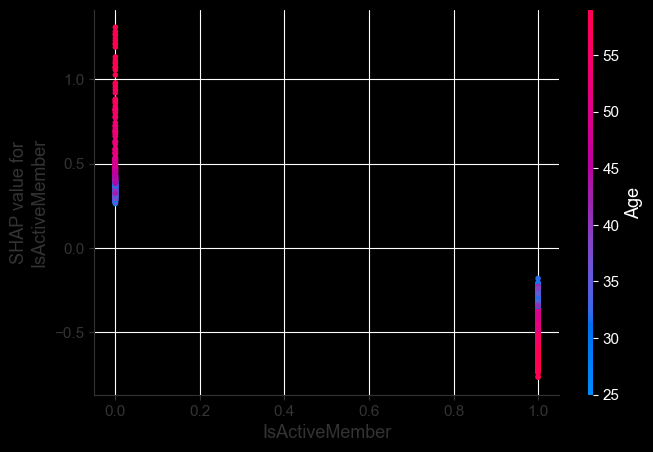

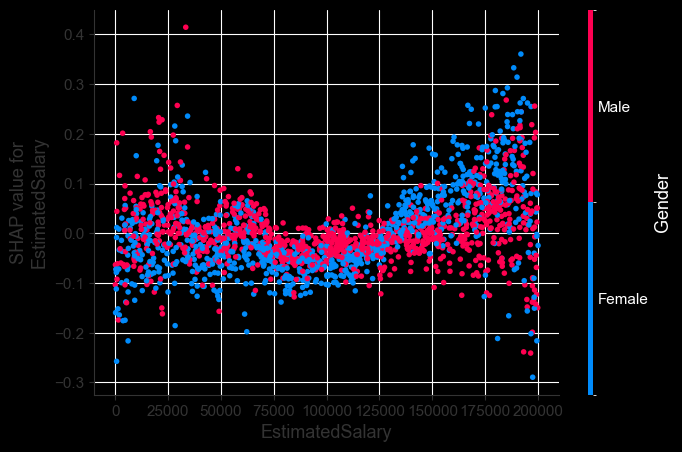

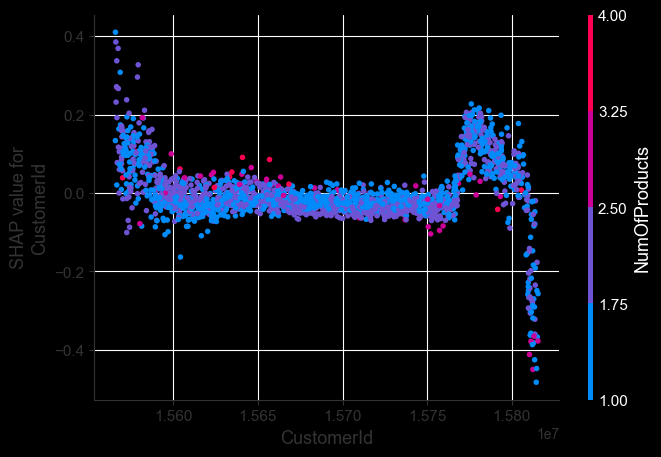

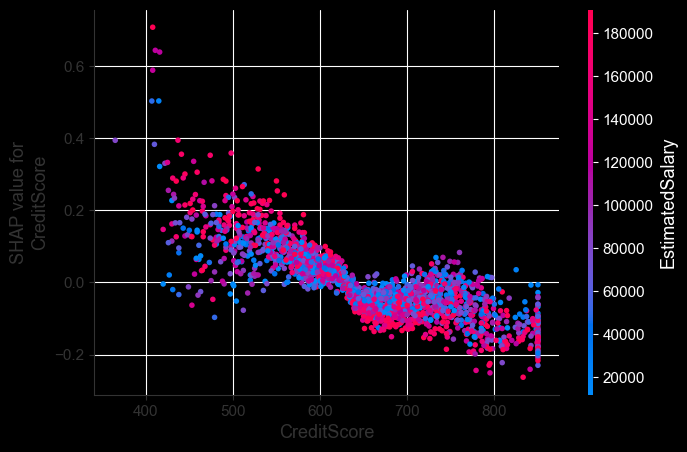

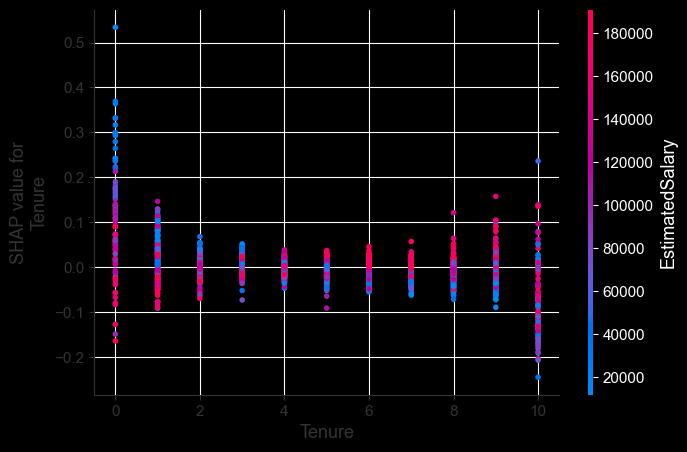

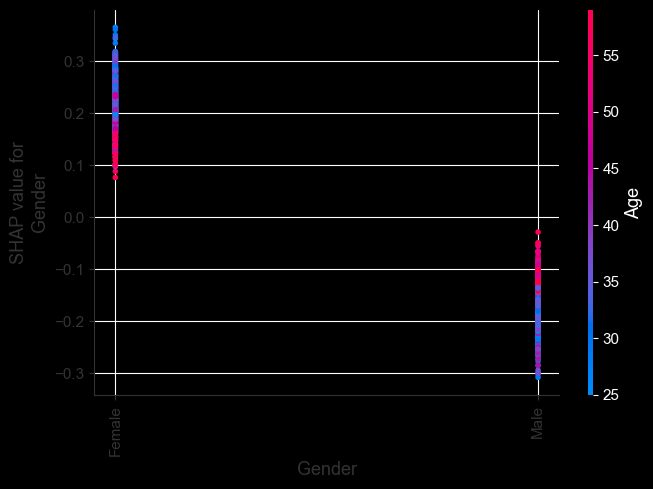

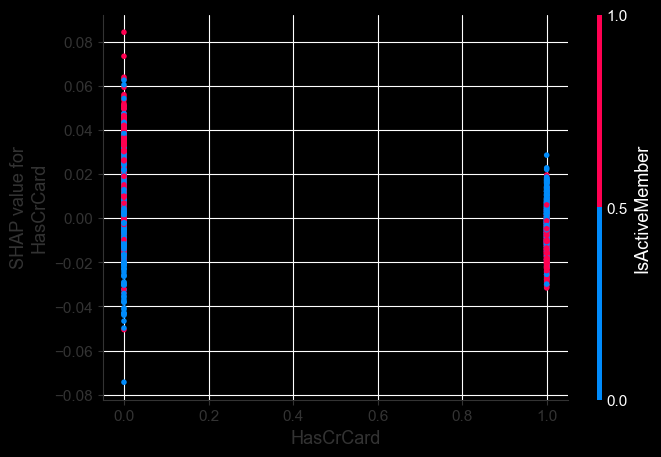

In [165]:
for feature in features:
    shap.dependence_plot(feature, shap_values, test[X])

## Классификация == Регрессия (технически)
По сути классификация - это та же регрессия, но после использовании сигмоида нормируются скоры.

In [146]:
model.predict(test[X], prediction_type='RawFormulaVal')

array([-1.88475323, -2.52652396, -1.47044046, ..., -1.73922605,
       -2.68750234, -2.93959577])

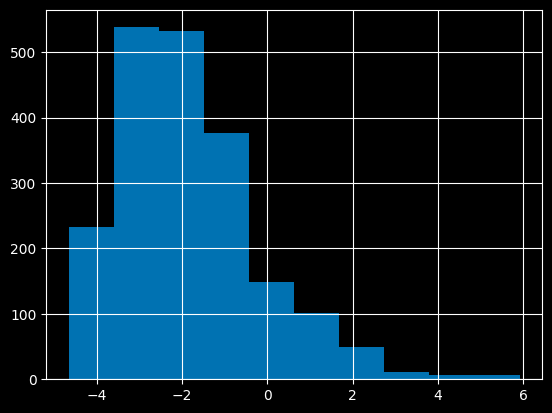

In [149]:
pd.Series(model.predict(test[X], prediction_type='RawFormulaVal')).hist();

Для того чтобы перевести числа на отрезке -∞ до +∞ нужно применить сигмоидную функцию

In [150]:
import math

In [151]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

Проверим и сравним результаты сигмоидной функции и предикт пробу катбуста

In [152]:
pd.Series(model.predict(test[X], prediction_type='RawFormulaVal')).apply(sigmoid)

0       0.131844
1       0.074020
2       0.186876
3       0.087403
4       0.056658
          ...   
1995    0.026803
1996    0.084712
1997    0.149411
1998    0.063715
1999    0.050231
Length: 2000, dtype: float64

Видим идентичные результаты

In [157]:
model.predict_proba(test[X])

array([[0.86815614, 0.13184386],
       [0.92598046, 0.07401954],
       [0.81312433, 0.18687567],
       ...,
       [0.85058873, 0.14941127],
       [0.93628515, 0.06371485],
       [0.94976945, 0.05023055]])

In [158]:
model.predict(test[X], prediction_type = 'Probability')

array([[0.86815614, 0.13184386],
       [0.92598046, 0.07401954],
       [0.81312433, 0.18687567],
       ...,
       [0.85058873, 0.14941127],
       [0.93628515, 0.06371485],
       [0.94976945, 0.05023055]])